DSCI552 HW6

Name: Ashley Chen

GitHub username: ash54x

USC ID: 8562317194

import libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, roc_auc_score, auc, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

1. Tree-Based Methods

(a) Load data

In [17]:
df_train = pd.read_csv("aps_failure_training_set.csv", skiprows=20)
df_test = pd.read_csv("aps_failure_test_set.csv", skiprows=20)

df_train.replace("na", np.nan, inplace=True)
df_test.replace("na", np.nan, inplace=True)

#convert feature columns to numeric
for df in [df_train, df_test]:
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

display(df_train, df_test)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


(b) Data Preparation

i. Common techniques to handle missing data include deleting rows or columns with missing values, mean imputation, median imputation, mode imputation, K-Nearest Neighbors (KNN) imputation, replacing missing values with the previous or next observed value, or generating multiple plausible datasets with different imputed values to account for uncertainty. 

In [18]:
#impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(df_train.iloc[:, 1:])
X_test = imputer.transform(df_test.iloc[:, 1:])

df_train.iloc[:, 1:] = X_train
df_test.iloc[:, 1:] = X_test

display(df_train, df_test)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,0.713189,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,0.713189,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,0.713189,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,0.713189,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,0.713189,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


ii. Calculate Coefficient of Variation (CV)

In [19]:
#separate features and labels
X_train_df = df_train.iloc[:, 1:]
y_train_series = df_train['class'].map({'pos': 1, 'neg':0})

#mean and standard deviations for each column
mean = X_train_df.mean()
stdev = X_train_df.std()

#coefficient of variation
cv = (stdev / mean).replace([np.inf, -np.inf], np.nan).fillna(0)

cv_values = pd.DataFrame({
    'StDev': stdev,
    'Mean': mean,
    'CV': cv
})

display(cv_values)

,StDev,Mean,CV
aa_000,1.454301e+05,5.933650e+04,2.450938
ab_000,1.660588e+00,7.131885e-01,2.328400
ac_000,7.724678e+08,3.560143e+08,2.169767
ad_000,3.504515e+07,1.906206e+05,183.847620
ae_000,1.581420e+02,6.819130e+00,23.190937
...,...,...,...
ee_007,1.718366e+06,3.462714e+05,4.962483
ee_008,4.469894e+05,1.387300e+05,3.222010
ee_009,4.720424e+04,8.388915e+03,5.626979
ef_000,4.268529e+00,9.057895e-02,47.124953


iii. Correlation Matrix

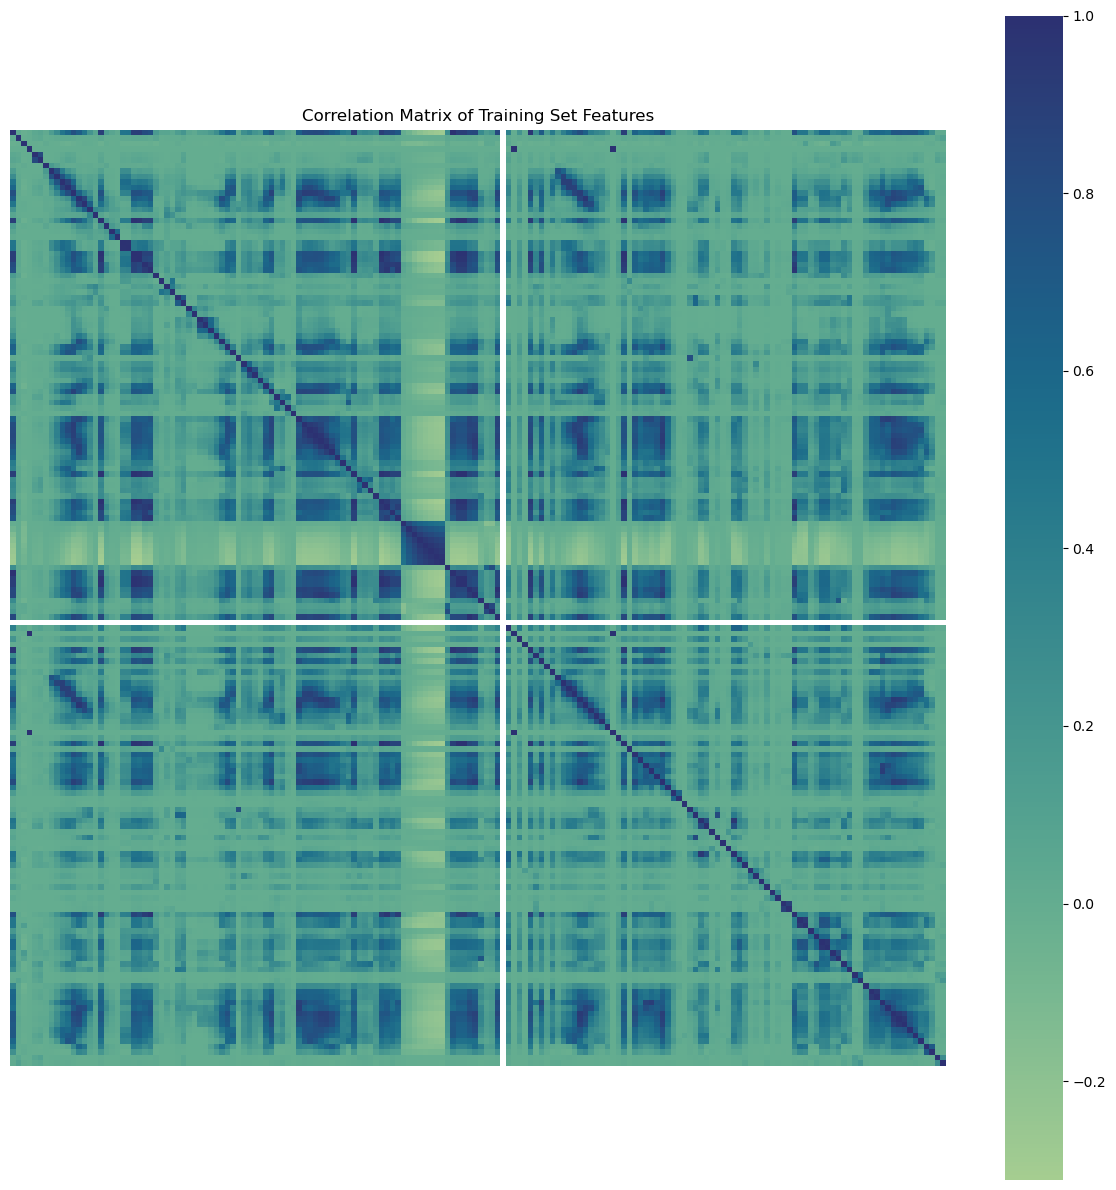

In [20]:
matrix = X_train_df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(matrix, cmap="crest", square=True, cbar=True)
plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.title("Correlation Matrix of Training Set Features")
plt.show()

iv. Scatterplot and Box plots

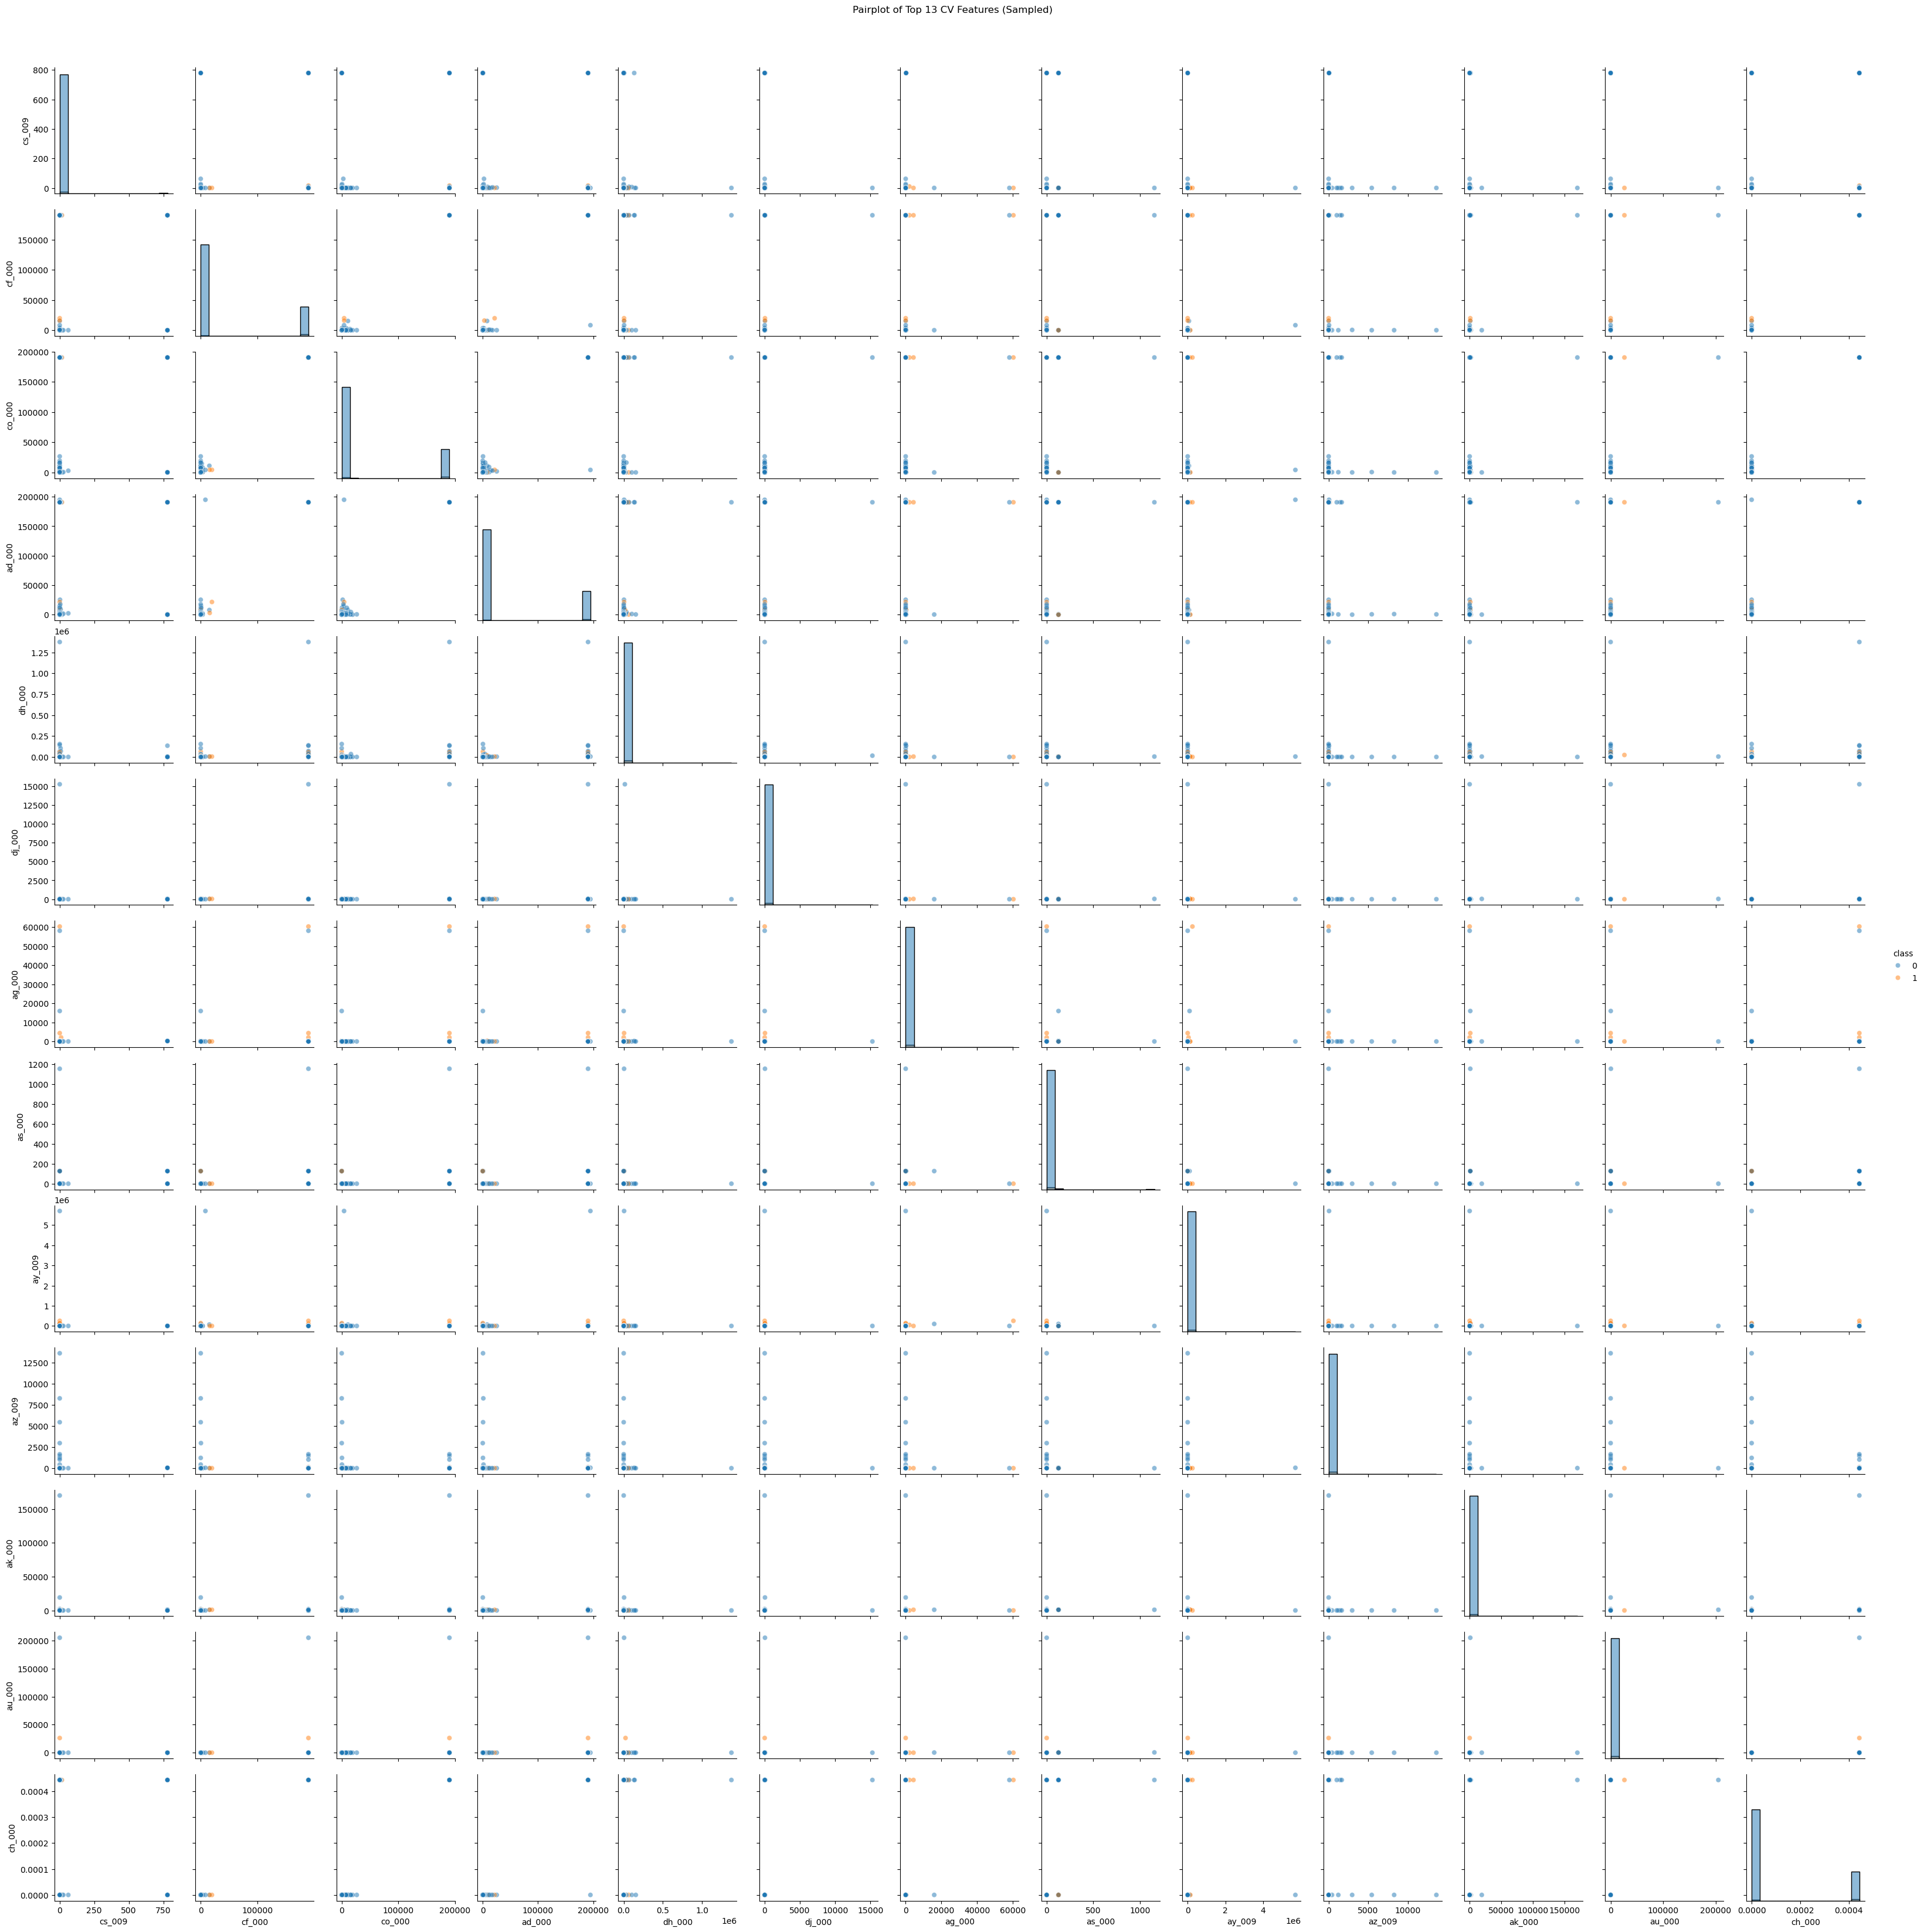

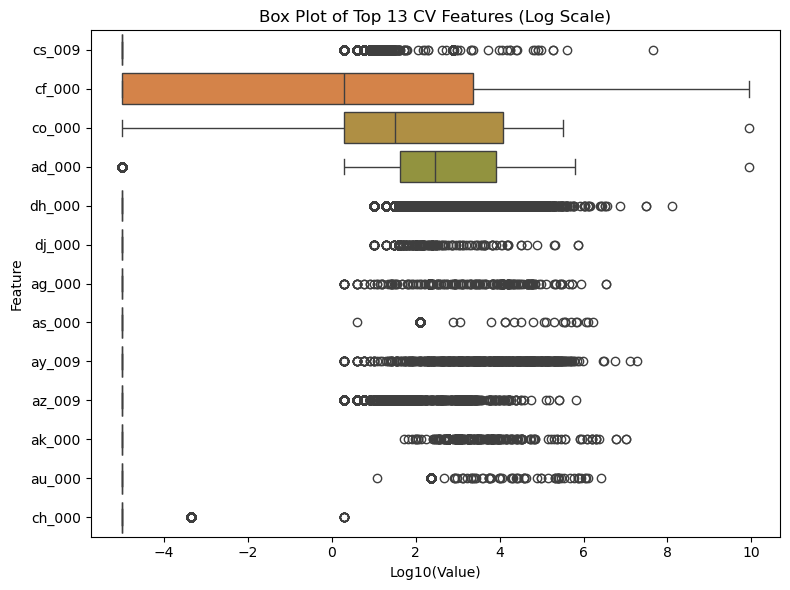

In [21]:
#top 13 features with highest cv
top_cv = cv.sort_values(ascending=False).head(13).index.tolist()

#pairplot
top_X = X_train_df[top_cv].copy()
top_X['class'] = y_train_series

sample_df = top_X.sample(n=3000, random_state=42)

sns.pairplot(sample_df, hue='class', diag_kind='hist', corner=False, plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Top 13 CV Features (Sampled)", y=1.02)
plt.show()

#box plots
plt.figure(figsize=(8, 6))
sns.boxplot(data=np.log10(X_train_df[top_cv] + 1e-5), orient='h')
plt.title("Box Plot of Top 13 CV Features (Log Scale)")
plt.xlabel("Log10(Value)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

v. Class Imbalance

In [22]:
negative_values = y_train_series.value_counts()[0]
positive_values = y_train_series.value_counts()[1]

print("Total positive values:", positive_values)
print("Total negative values:", negative_values)

Total positive values: 1000
Total negative values: 59000


Based on the total positive and total negative values, we can see that there are way more negative values than positive values, making the data highly imbalanced. 

(c) Random Forest (No Class Compensation)


Evaluation on Training
Confusion Matrix:
[[58976    24]
 [  432   568]]
Accuracy: 0.9924
Error: 0.0076


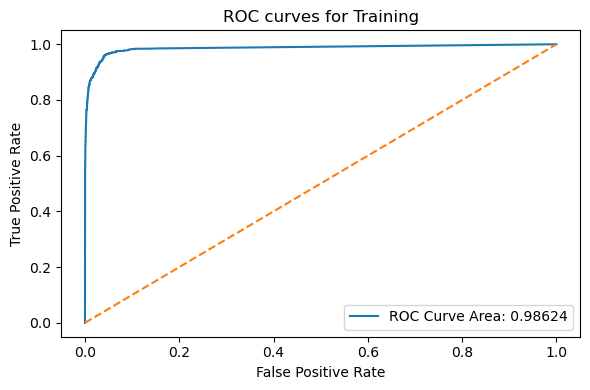


Evaluation on Testing
Confusion Matrix:
[[15611    14]
 [  173   202]]
Accuracy: 0.98831
Error: 0.01169


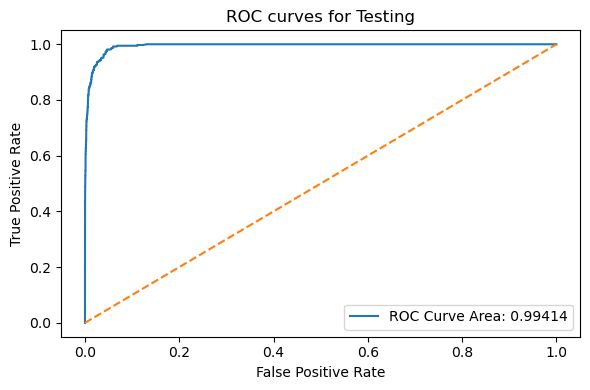


Out-of-Bag (OOB) Error: 0.00928
Test Error: 0.01169
Comparison: Test error is 25.9% higher than OOB error
Test error is higher — likely due to class imbalance and generalization gap.


In [24]:
#define helper functions
def show_roc(y_true, y_prob, dataset_label):
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC Curve Area: {round(roc_auc, 5)}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC curves for {dataset_label}")
    plt.legend()
    plt.tight_layout()
    plt.show()

def evaluate_model(model, X, y, dataset_label):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)

    cm = confusion_matrix(y, y_pred)
    acc = accuracy_score(y, y_pred)
    err = 1 - acc

    print(f"\nEvaluation on {dataset_label}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {round(acc, 5)}")
    print(f"Error: {round(err, 5)}")

    show_roc(y, y_prob, dataset_label)
    return acc, err

y_test_series = df_test['class'].map({'pos': 1, 'neg': 0})

X_train_rf = X_train 
y_train_rf = y_train_series
X_test_rf = X_test
y_test_rf = y_test_series

#train the model
rf_model = RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

train_acc, train_err = evaluate_model(rf_model, X_train_rf, y_train_rf, "Training")
test_acc, test_err = evaluate_model(rf_model, X_test_rf, y_test_rf, "Testing")

oob_error = 1 - rf_model.oob_score_
print(f"\nOut-of-Bag (OOB) Error: {round(oob_error, 5)}")
print(f"Test Error: {round(test_err, 5)}")
print(f"Comparison: Test error is {round((test_err - oob_error)/oob_error * 100, 2)}% higher than OOB error")

if test_err > oob_error:
    print("Test error is higher — likely due to class imbalance and generalization gap.")
else:
    print("Test error is comparable to OOB error.")

(d) Random Forest (Class Compensation)


Evaluation on Training (Balanced RF)
Confusion Matrix:
[[56610  2390]
 [   31   969]]
Accuracy: 0.95965
Error: 0.04035


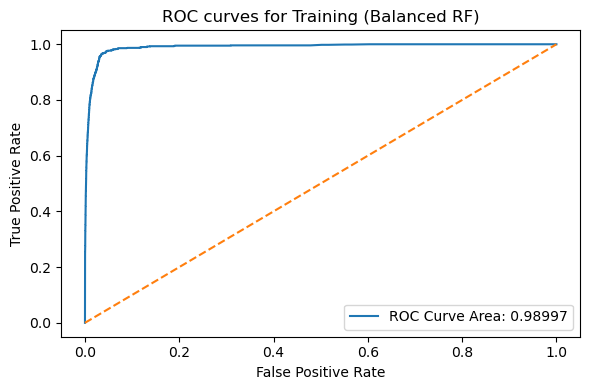


Evaluation on Testing (Balanced RF)
Confusion Matrix:
[[15013   612]
 [   12   363]]
Accuracy: 0.961
Error: 0.039


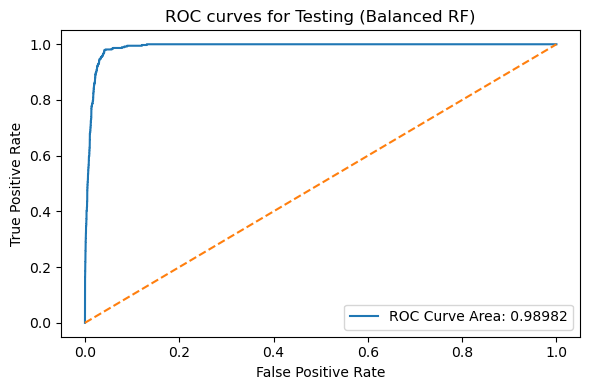


Balanced RF OOB Error: 0.04157
Balanced RF Test Error: 0.039
Test error is comparable to OOB error.


In [26]:
#fit random forest with class_weight='balanced'
rf_balanced = RandomForestClassifier(max_depth=5, oob_score=True, random_state=42, class_weight='balanced')
rf_balanced.fit(X_train_rf, y_train_rf)

_ = evaluate_model(rf_balanced, X_train_rf, y_train_rf, "Training (Balanced RF)")
_ = evaluate_model(rf_balanced, X_test_rf, y_test_series, "Testing (Balanced RF)")

oob_balanced_error = 1 - rf_balanced.oob_score_
test_balanced_error = 1 - accuracy_score(y_test_series, rf_balanced.predict(X_test_rf))
print(f"\nBalanced RF OOB Error: {round(oob_balanced_error, 5)}")
print(f"Balanced RF Test Error: {round(test_balanced_error, 5)}")

if test_balanced_error > oob_balanced_error:
    print("Test error is higher — likely due to class imbalance and generalization gap.")
else:
    print("Test error is comparable to OOB error.")

Even though the unbalanced model has higher accuracy, the balanced random forest model is clearly superior for detecting the minority class (failures), which is the main goal of the APS failure prediction task.

(e) XGBoost (Uncompensated)

XGBoost CV AUC (Uncompensated): 0.98659

Evaluation on Training (XGBoost)
Confusion Matrix:
[[59000     0]
 [    1   999]]
Accuracy: 0.99998
Error: 2e-05


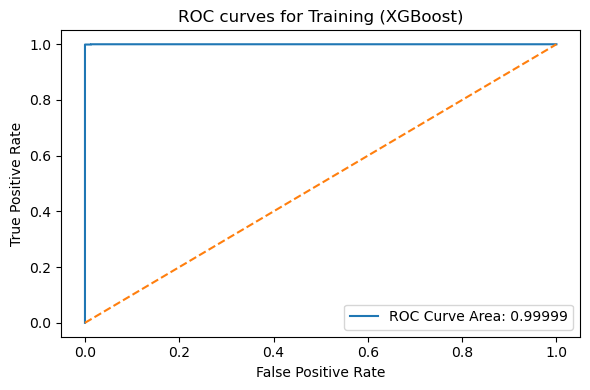


Evaluation on Testing (XGBoost)
Confusion Matrix:
[[15602    23]
 [   90   285]]
Accuracy: 0.99294
Error: 0.00706


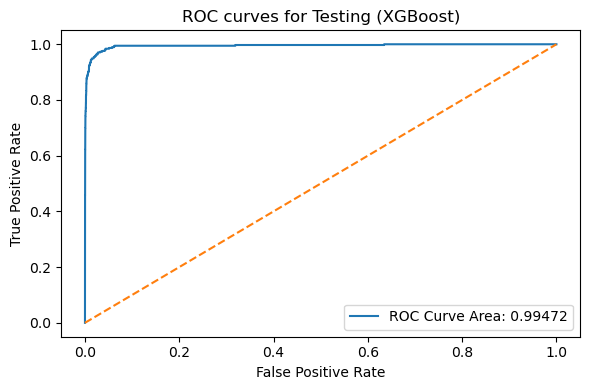

In [29]:
#XGBoost model with L1 penalty (alpha=1)
xgb_unbalanced = XGBClassifier(use_label_encoder=False, eval_metric='logloss', alpha=1, n_jobs=-1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#cross-validation AUC
cv_auc_scores = cross_val_score(xgb_unbalanced, X_train_rf, y_train_rf, cv=kfold, scoring='roc_auc')
print("XGBoost CV AUC (Uncompensated):", round(cv_auc_scores.mean(), 5))

#train and evaluate
xgb_unbalanced.fit(X_train_rf, y_train_rf)
_ = evaluate_model(xgb_unbalanced, X_train_rf, y_train_rf, "Training (XGBoost)")
_ = evaluate_model(xgb_unbalanced, X_test_rf, y_test_series, "Testing (XGBoost)")

(f) SMOTE and XGBoost

After SMOTE: [59000 59000]
XGBoost CV AUC (SMOTE): 0.99996

Evaluation on Training (SMOTE XGB)
Confusion Matrix:
[[59000     0]
 [    1 58999]]
Accuracy: 0.99999
Error: 1e-05


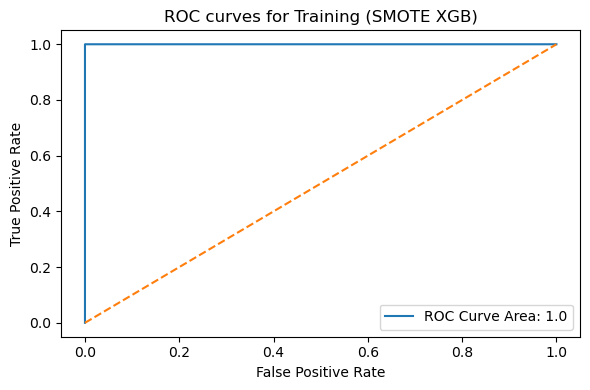


Evaluation on Testing (SMOTE XGB)
Confusion Matrix:
[[15576    49]
 [   62   313]]
Accuracy: 0.99306
Error: 0.00694


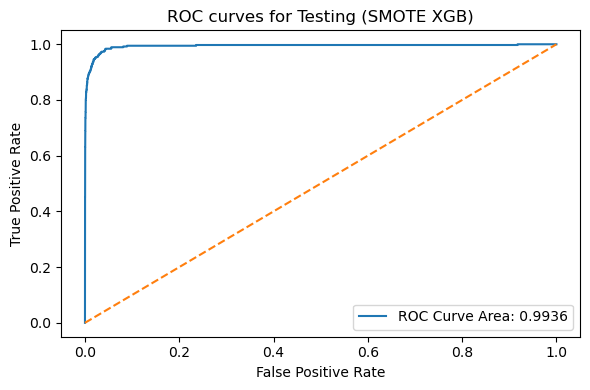

In [30]:
#apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_rf, y_train_rf)

#confirm balance
print("After SMOTE:", np.bincount(y_train_smote))

#XGBoost model with L1 regularization (same config)
xgb_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss', alpha=1, n_jobs=-1)

cv_auc_smote = cross_val_score(xgb_smote, X_train_smote, y_train_smote, cv=kfold, scoring='roc_auc')
print("XGBoost CV AUC (SMOTE):", round(cv_auc_smote.mean(), 5))

xgb_smote.fit(X_train_smote, y_train_smote)
_ = evaluate_model(xgb_smote, X_train_smote, y_train_smote, "Training (SMOTE XGB)")
_ = evaluate_model(xgb_smote, X_test_rf, y_test_series, "Testing (SMOTE XGB)")


In [31]:
#uncompensated (no SMOTE) model results
stats_1 = {
    'train': {
        'error': 1 - accuracy_score(y_train_rf, xgb_unbalanced.predict(X_train_rf)),
        'accuracy': accuracy_score(y_train_rf, xgb_unbalanced.predict(X_train_rf)),
        'roc': roc_auc_score(y_train_rf, xgb_unbalanced.predict_proba(X_train_rf)[:, 1])
    },
    'test': {
        'error': 1 - accuracy_score(y_test_series, xgb_unbalanced.predict(X_test_rf)),
        'accuracy': accuracy_score(y_test_series, xgb_unbalanced.predict(X_test_rf)),
        'roc': roc_auc_score(y_test_series, xgb_unbalanced.predict_proba(X_test_rf)[:, 1])
    }
}

#SMOTE model results
stats_2 = {
    'train': {
        'error': 1 - accuracy_score(y_train_smote, xgb_smote.predict(X_train_smote)),
        'accuracy': accuracy_score(y_train_smote, xgb_smote.predict(X_train_smote)),
        'roc': roc_auc_score(y_train_smote, xgb_smote.predict_proba(X_train_smote)[:, 1])
    },
    'test': {
        'error': 1 - accuracy_score(y_test_series, xgb_smote.predict(X_test_rf)),
        'accuracy': accuracy_score(y_test_series, xgb_smote.predict(X_test_rf)),
        'roc': roc_auc_score(y_test_series, xgb_smote.predict_proba(X_test_rf)[:, 1])
    }
}

results = [
    [stats_1['train']['error'], stats_1['train']['accuracy'], stats_1['train']['roc'],
     stats_1['test']['error'], stats_1['test']['accuracy'], stats_1['test']['roc']],
    
    [stats_2['train']['error'], stats_2['train']['accuracy'], stats_2['train']['roc'],
     stats_2['test']['error'], stats_2['test']['accuracy'], stats_2['test']['roc']]
]

df_summary = pd.DataFrame(results, columns=[
    'Train Error', 'Train Accuracy', 'Train ROC',
    'Test Error', 'Test Accuracy', 'Test ROC'
])

df_summary.index = ['Without SMOTE', 'with SMOTE']
display(df_summary)


,Train Error,Train Accuracy,Train ROC,Test Error,Test Accuracy,Test ROC
Without SMOTE,0.000017,0.999983,0.999987,0.007062,0.992938,0.994716
with SMOTE,0.000008,0.999992,1.000000,0.006938,0.993062,0.993595


2. ISLR 6.6.

(a) Steadily decrease

As s increases, the model has more flexibility (more nonzero coefficients), and can better fit the training data. Thus, training RSS will never increase with increasing s, and will either stay the same or decrease. 


(b) Decrease initially, and then eventually start increasing in a U shape

Small s leads to underfitting, which leads to high bias and a high test error. A moderate s creates optimal balance leading to a minimum test RSS. A large s results in overfitting, creating high variance, and increases the test RSS, giving a U-shaped curve for the test RSS.


(c) Steadily increase

Larger s allows for more model complexity, leading to coefficients fluctuating more with changes in data and higher variance. 


(d) Steadily decrease

A more flexible model better approximates the true relationship, resulting in lower bias. As s increases, the bias steadily decreases. 


(e) Remain constant

The irreducible error is due to noise in the data, not the model. It's independent of s and can't be reduced by changing the model.

3. ISLR, 6.6.5

(a) Ridge Regression Optimization Problem

The ridge regression objective is:

\[
\min_{\beta_1, \beta_2} \sum_{i=1}^2 \left( y_i - \beta_1 x_{i1} - \beta_2 x_{i2} \right)^2 + \lambda \left( \beta_1^2 + \beta_2^2 \right)
\]

Since \( x_{i1} = x_{i2} = z_i \), we can simplify:

\[
\min_{\beta_1, \beta_2} \sum_{i=1}^2 \left( y_i - z_i(\beta_1 + \beta_2) \right)^2 + \lambda \left( \beta_1^2 + \beta_2^2 \right)
\]

(b) Ridge Coefficient Equality

Let \( \theta = \beta_1 + \beta_2 \). The objective becomes:

\[
\sum_{i=1}^2 (y_i - z_i \theta)^2 + \lambda (\beta_1^2 + \beta_2^2)
\]

- The residual depends only on \( \theta \)
- The penalty term is minimized when \( \beta_1 = \beta_2 = \frac{\theta}{2} \)

Therefore:

\[
\hat{\beta}_1 = \hat{\beta}_2
\]

Ridge tends to **equalize** coefficients for perfectly correlated predictors.

(c) Lasso Optimization Formulation

Let \( \theta = \beta_1 + \beta_2 \). The objective becomes:

\[
\sum_{i=1}^2 (y_i - z_i \theta)^2 + \lambda (\beta_1^2 + \beta_2^2)
\]

- The residual depends only on \( \theta \)
- The penalty term is minimized when \( \beta_1 = \beta_2 = \frac{\theta}{2} \)

Therefore:

\[
\hat{\beta}_1 = \hat{\beta}_2
\]

Ridge tends to **equalize** coefficients for perfectly correlated predictors.

(d) Lasso Coefficients Not Unique

Let \( \theta = \beta_1 + \beta_2 \). The residual part depends only on \( \theta \):

\[
\sum_{i=1}^2 \left( y_i - z_i \theta \right)^2
\]

The \( L_1 \) penalty is:

\[
|\beta_1| + |\beta_2|
\]

Any pair \( (\beta_1, \beta_2) \) such that \( \beta_1 + \beta_2 = \theta \) and \( |\beta_1| + |\beta_2| = |\theta| \) will result in the same objective value.

For example: 
If \( \theta = 1 \), then:
- \( (1, 0) \), \( (0.5, 0.5) \), \( (0.2, 0.8) \) all satisfy:
    - \( \beta_1 + \beta_2 = 1 \)
    - \( |\beta_1| + |\beta_2| = 1 \)

Therefore, the lasso solution is not unique in this setting.

Lasso may assign all weight to one variable or split it unevenly depending on the solver or regularization path.

4. ISLR 8.4.5

Majority Vote Approach: Out of the 10 probability estimates, 6 are greater than 0.5, so the majority vote classifies the observation as red.

Average Probability Approach: The average estimated probability of the class being Red is 0.45, which is below the 0.5 threshold, so this method classifies the observation as green.

5. ISLR 9.7.3

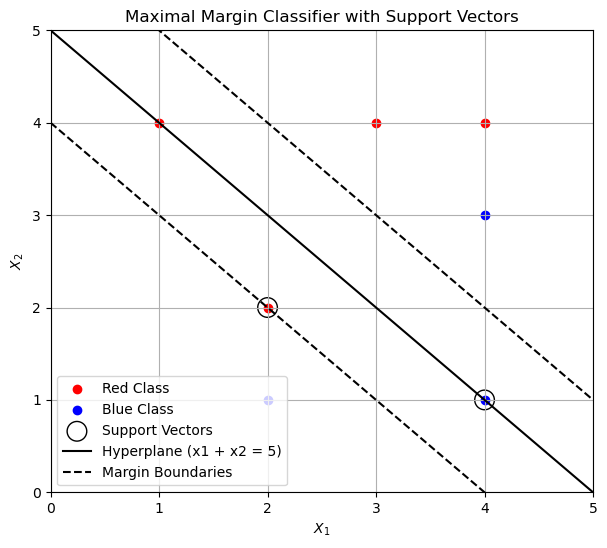

In [36]:
#observations
X_red = np.array([[3, 4], [2, 2], [4, 4], [1, 4]])
X_blue = np.array([[2, 1], [4, 3], [4, 1]])

#labels
support_vectors = np.array([[2, 2], [4, 1]])

#for optional non-separaable case
X_extra = np.array([[3, 1]])

fig, ax = plt.subplots(figsize=(7, 6))

#plot points
ax.scatter(X_red[:, 0], X_red[:, 1], color='red', label='Red Class')
ax.scatter(X_blue[:, 0], X_blue[:, 1], color='blue', label='Blue Class')

#plot support vectors
ax.scatter(support_vectors[:, 0], support_vectors[:, 1],
           s=200, facecolors='none', edgecolors='black', label='Support Vectors')

x_vals = np.linspace(0, 5, 100)
hyperplane = 5 - x_vals
margin_pos = 6 - x_vals
margin_neg = 4 - x_vals

ax.plot(x_vals, hyperplane, 'k-', label='Hyperplane (x1 + x2 = 5)')
ax.plot(x_vals, margin_pos, 'k--', label='Margin Boundaries')
ax.plot(x_vals, margin_neg, 'k--')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_title("Maximal Margin Classifier with Support Vectors")
ax.legend()
ax.grid(True)
plt.show()


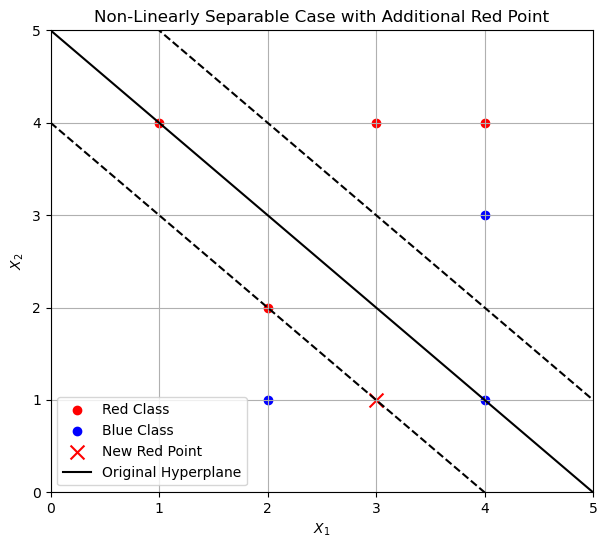

In [37]:
fig, ax = plt.subplots(figsize=(7, 6))

#plot original points
ax.scatter(X_red[:, 0], X_red[:, 1], color='red', label='Red Class')
ax.scatter(X_blue[:, 0], X_blue[:, 1], color='blue', label='Blue Class')

#add non-separable Red point
ax.scatter(X_extra[:, 0], X_extra[:, 1], color='red', marker='x', s=100, label='New Red Point')

ax.plot(x_vals, hyperplane, 'k-', label='Original Hyperplane')
ax.plot(x_vals, margin_pos, 'k--')
ax.plot(x_vals, margin_neg, 'k--')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_title("Non-Linearly Separable Case with Additional Red Point")
ax.legend()
ax.grid(True)
plt.show()


(a) Visualizations are plotted above.

(b) The optimal separating hyperplane is X1 + X2 = 5. This line splits the Red and Blue classes with the maximum margin, and is plotted as the solid black line in the visualization.

(c) The classification rule for the maximal margin classifier is "classify as Red if X1 + X2 > 5, otherwise classify as Blue". Using the standard form beta0 + beta1X1 + beta2X2 = 0, we have beta0 = -5, beta1 = 1, and beta2 = 1.

(d) The margin is defined by the two dashed lines: X1 + X2 = 6 (upper margin boundary) and X1 + X2 = 4 (lower margin boundary). The distance between the margin boundaries is Margin = 2/sqrt(1^2+1^2) = sqrt(2).

(e) Support vectors are the observations that lie exactly on the margin lines. The red support vector (2, 2) lies on X1 + X2 = 4 and the blue support vector (4, 1) lies on X1 + X2 = 5. These are visually marked by large hollow markers in the plot.

(f) Observation 7 is the point (4, 1), which is a support vector. So a slight movement of this point would affect the maximal margin hyperplane, since the margin is defined by it.

(g) A non-optimal separating hyperplane can be any line that still separates the classes but with smaller margin. For example: X1 + X2 = 6. This line is closer to the Red class and doesn't maximize the margin. It's visible in the plot as the upper dashed margin line. 

(h) In the second plot, a new Red point at (3, 1) is added. This point lies in the region of the Blue class, below the hyperplane. It causes class overlap, making the data no longer linearly separable by any hyperplane. 